In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import os
import anndata
import matplotlib

matplotlib.rcParams['pdf.fonttype']=42
matplotlib.rcParams['ps.fonttype']=42

# scanpy settings
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150, frameon=False, figsize=(4, 4)) 
sc._settings.ScanpyConfig.n_jobs=4

In [2]:
data = sc.read_h5ad('data/all_NK_sample1000_raw.h5ad')

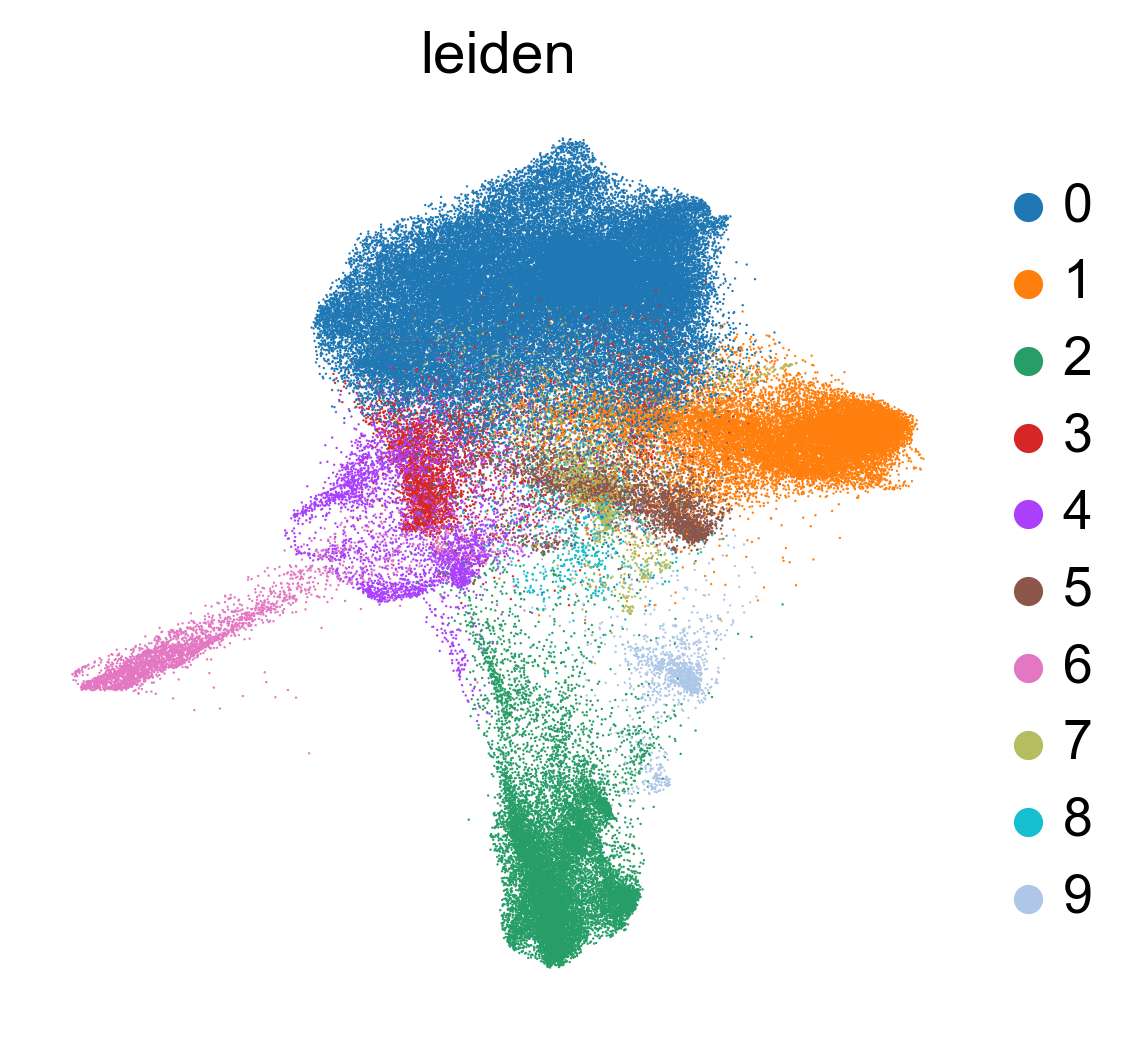

In [3]:
sc.pl.draw_graph(data, color=['leiden'], show=True)

In [4]:
sample_index = data.obs.groupby('Breastmilk_group').apply(lambda x: x.sample(n=12591, random_state=0)).index.droplevel(level=0) 
data_sub = data[sample_index]

/Users/tan/anaconda3/envs/PAGA-2/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1156: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlOrRd").copy()
  color_map.set_over('black')
/Users/tan/anaconda3/envs/PAGA-2/lib/python3.7/site-packages/scanpy/plotting/_tools/__init__.py:1157: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlOrRd").copy()
  color_map.set_under('lightgray')
/Users/tan/anaconda3/envs/PAGA-2/lib/python3.7/site-packages/scanpy/plotting/_tools/scatterplots.py:400: Matplo

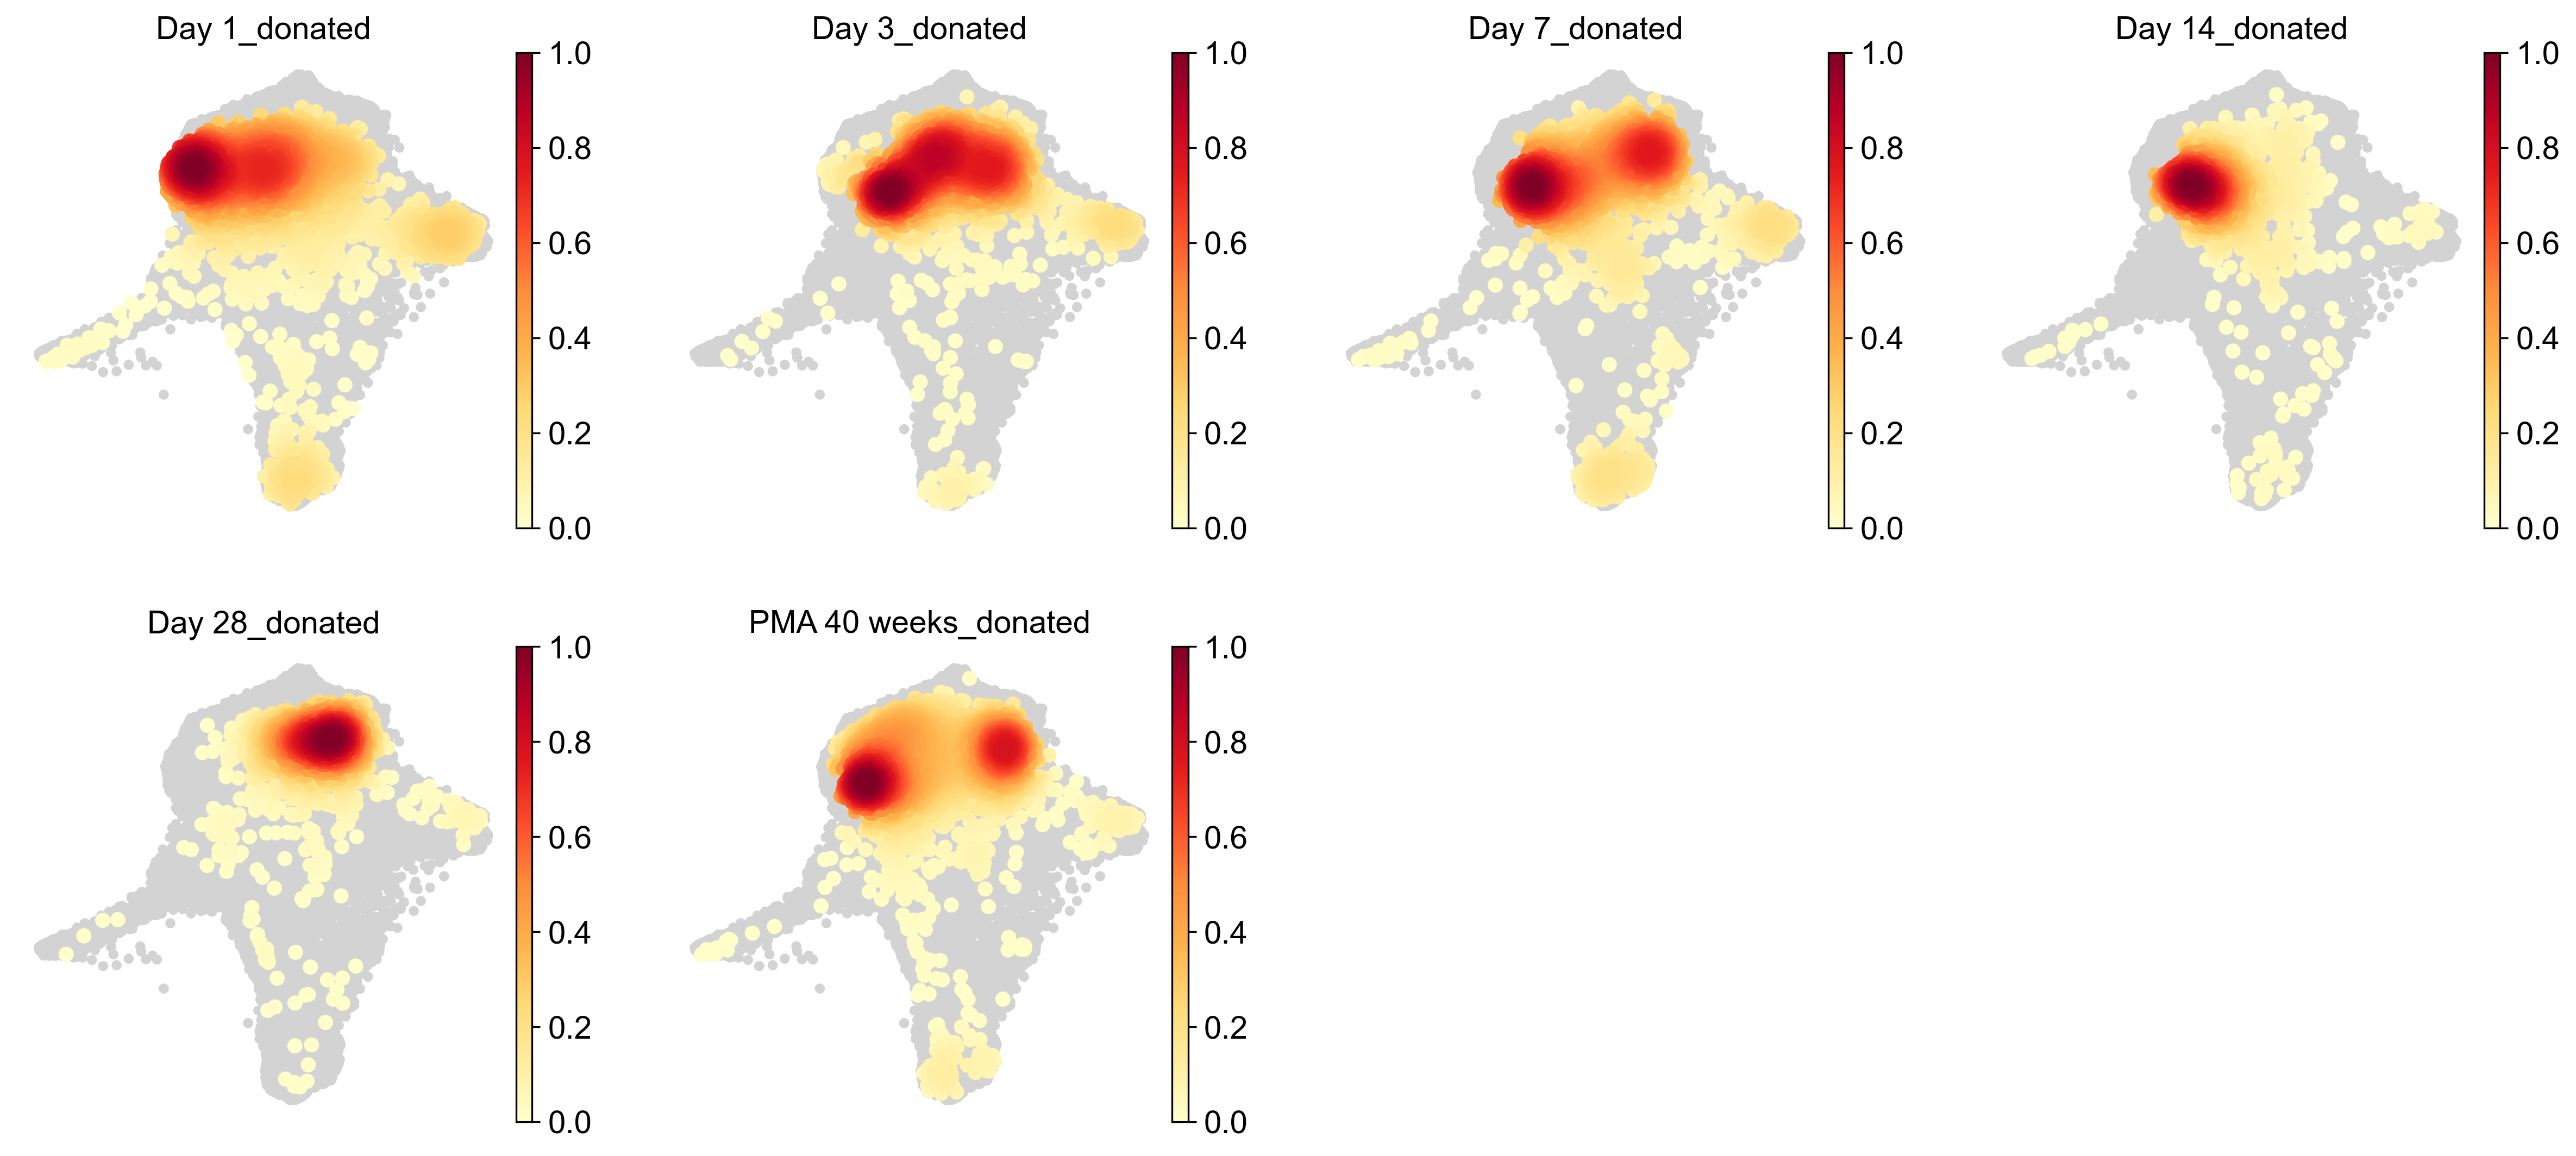

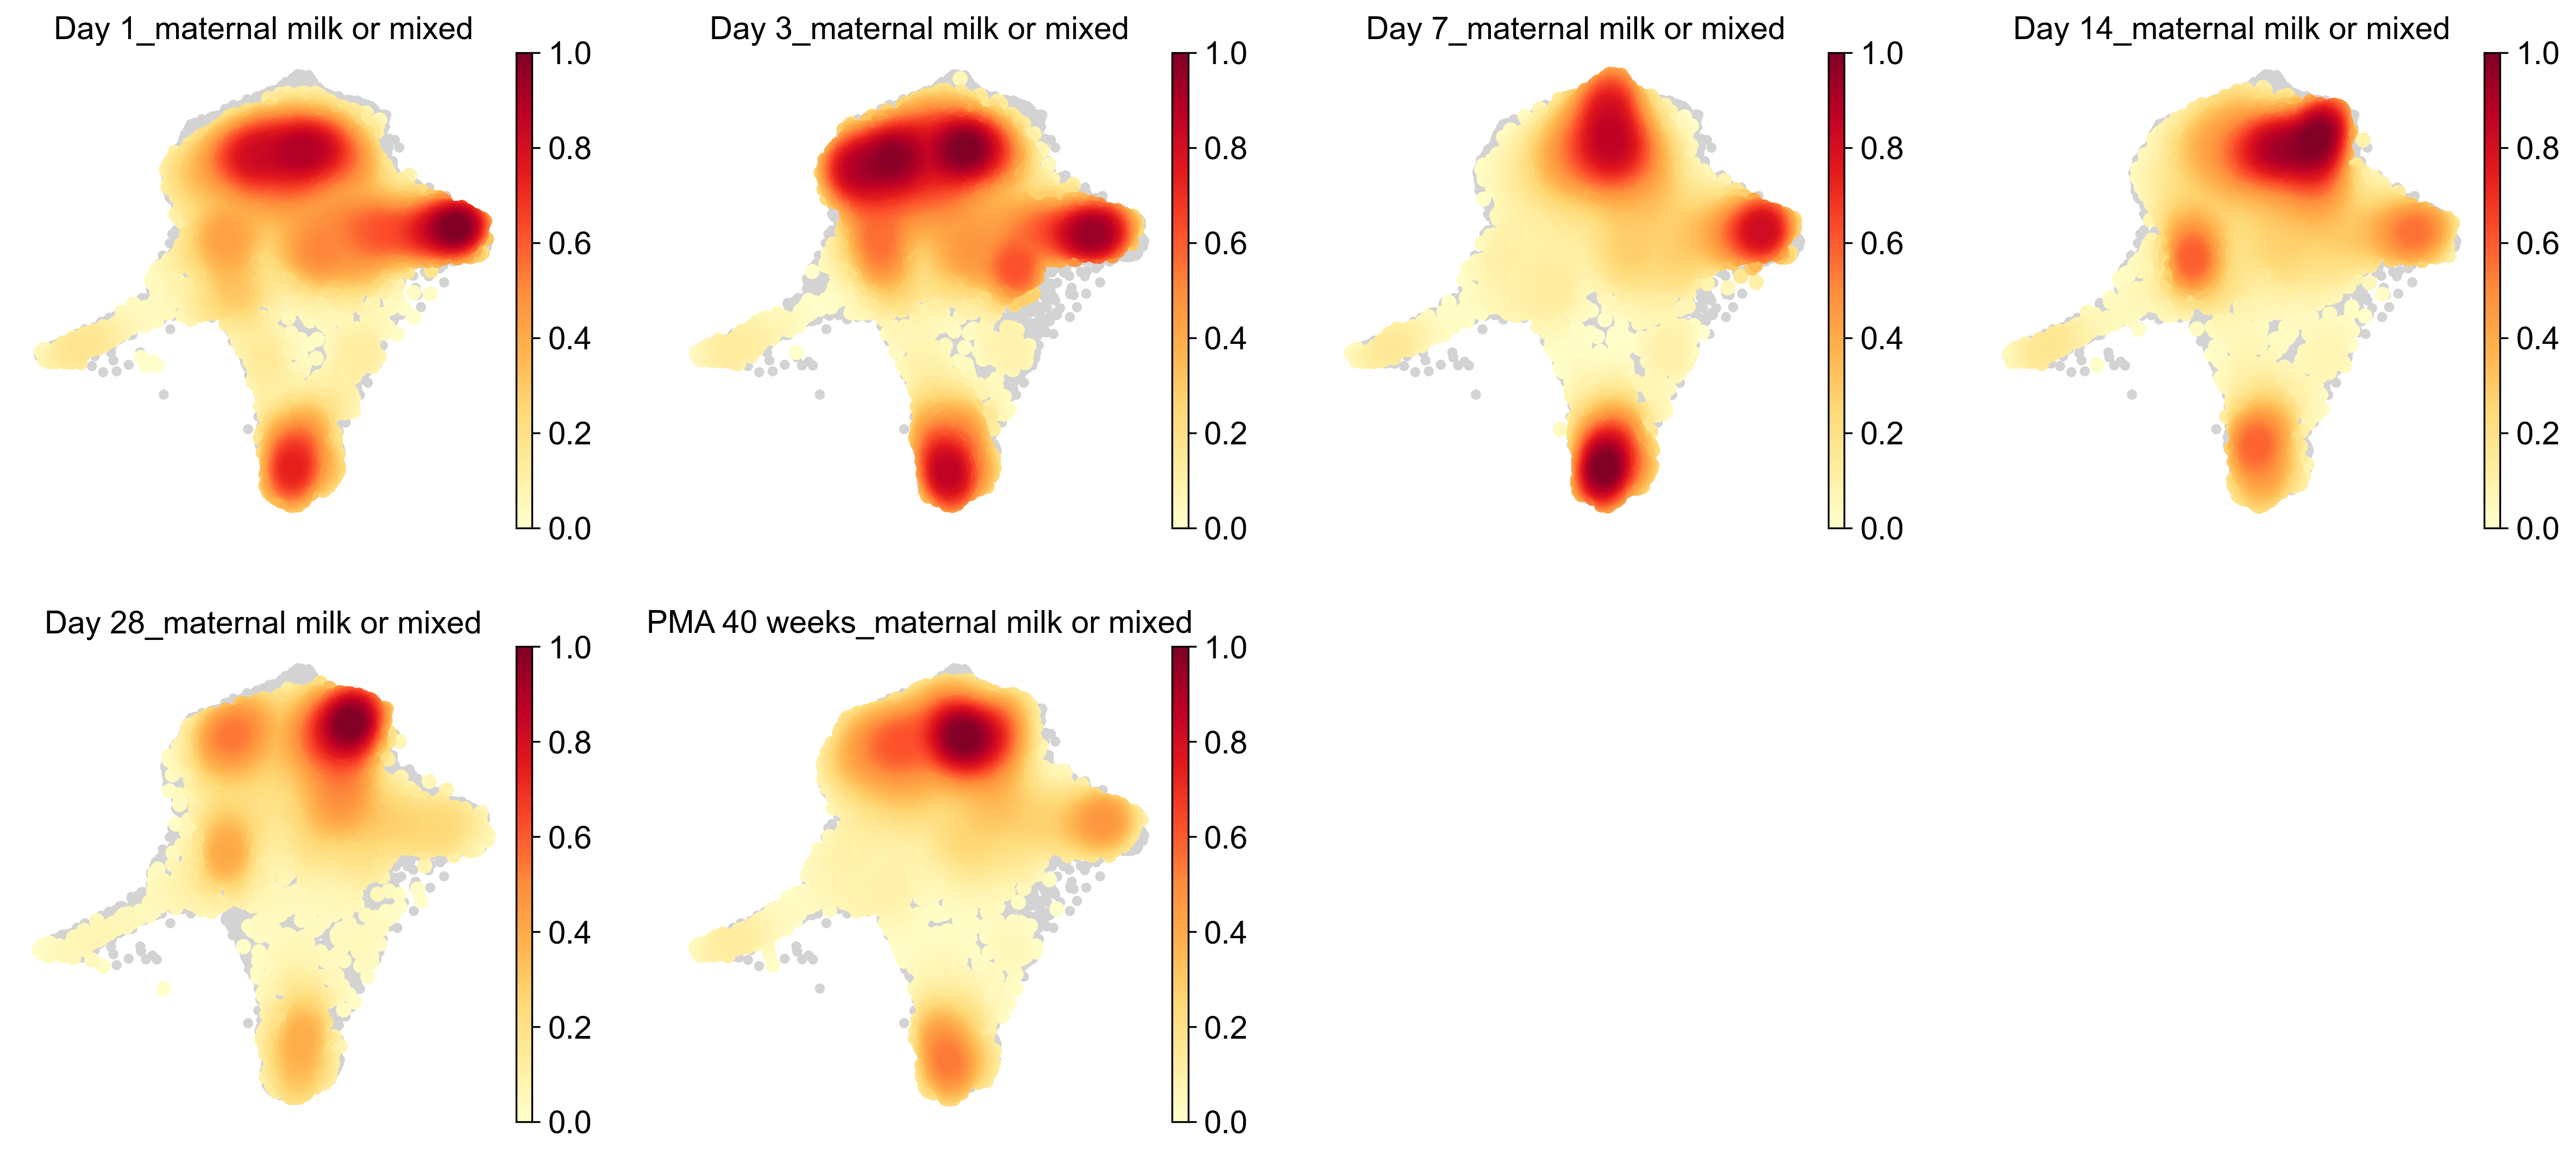

In [5]:
sub_name = 'NK'
figpath='./test/'
os.makedirs(figpath, exist_ok=True)
sc.settings.figdir=figpath

sc.tl.embedding_density(data, basis='draw_graph_fa', groupby='timepoint_group')
sc.pl.embedding_density(data, basis='draw_graph_fa', key='draw_graph_fa_density_timepoint_group', show=True, 
                        group=[timepoint + '_donated' for timepoint in data.obs['Timepoint_string'].cat.categories],
                        save='_' + sub_name + '_timepoint_donated_density.pdf')
sc.pl.embedding_density(data, basis='draw_graph_fa', key='draw_graph_fa_density_timepoint_group', show=True, 
                        group=[timepoint + '_maternal milk or mixed' for timepoint in data.obs['Timepoint_string'].cat.categories],
                        save='_' + sub_name + '_timepoint_maternal_density.pdf')

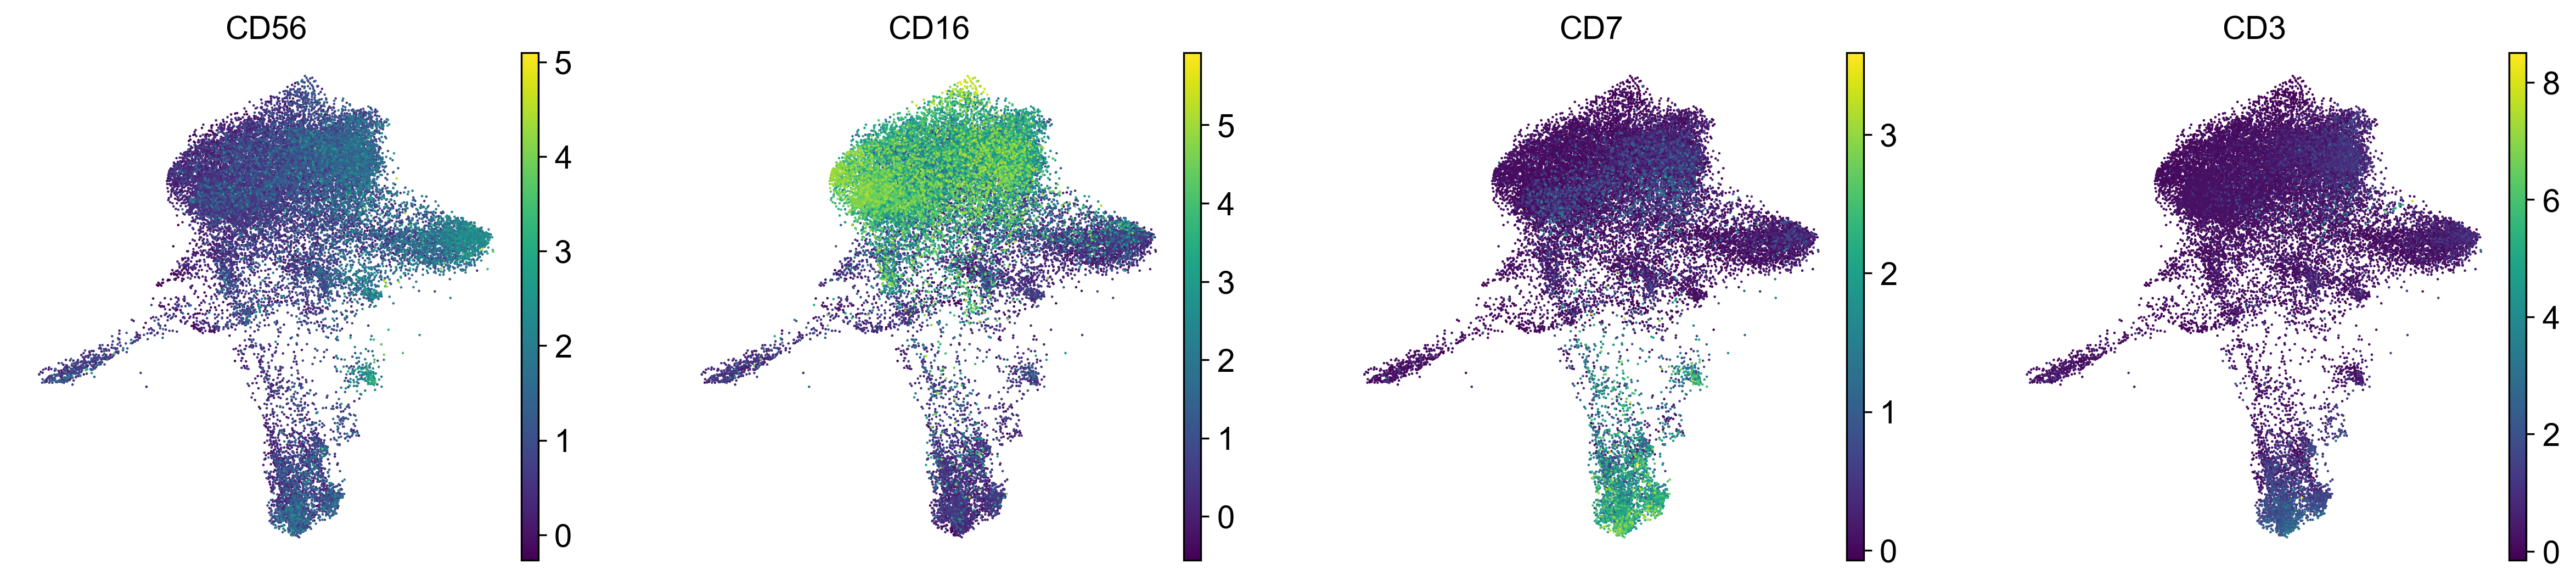

In [6]:
sc.pl.draw_graph(data_sub, color=['CD56', 'CD16', 'CD7', 'CD3'], show=True, 
                 save='_' + sub_name + '_markers.pdf')